<a href="https://colab.research.google.com/github/Bushra-Infinity/data-mining/blob/main/Data_Preprocessing_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset with Duplicates:
    ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
4   4    David   40
5   5      Eve   28
6   6    Frank   50
7   6    Frank   50

After Removing Duplicates:
    ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
5   5      Eve   28
6   6    Frank   50

Original Dataset with Missing Values:
       Name   Age   Salary         City
0    Alice  25.0  50000.0     New York
1      Bob  30.0  60000.0  Los Angeles
2  Charlie   NaN  55000.0         None
3    David  40.0      NaN      Chicago
4      Eve  28.0  58000.0      Houston

After Dropping Rows with Missing Values:
     Name   Age   Salary         City
0  Alice  25.0  50000.0     New York
1    Bob  30.0  60000.0  Los Angeles
4    Eve  28.0  58000.0      Houston

After Dropping Columns with Missing Values:
       Name
0    Alice
1      Bob
2  Charlie
3    David
4      Eve

After Filling with 0:
       Name   Ag

/tmp/ipython-input-5-2546796911.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
/tmp/ipython-input-5-2546796911.py:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

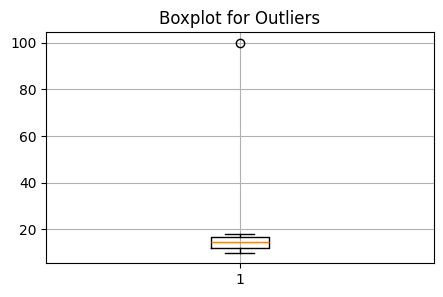


Z-scores: [-0.49085998 -0.41355919 -0.41355919 -0.3749088  -0.33625841 -0.29760802
 -0.25895763 -0.22030723 -0.18165684  2.9876753 ]
Outliers Indices: (array([9]),)
Outlier Values: [100]

Label Encoded Values: [2 1 0 2 1]


In [5]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from scipy import stats
import matplotlib.pyplot as plt

# --------------------------------------------

# 2. Removing Duplicates
data1 = {
    'ID': [1, 2, 3, 4, 4, 5, 6, 6],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'David', 'Eve', 'Frank', 'Frank'],
    'Age': [25, 30, 35, 40, 40, 28, 50, 50]
}
df1 = pd.DataFrame(data1)
print("Original Dataset with Duplicates:\n", df1)
df1_cleaned = df1.drop_duplicates()
print("\nAfter Removing Duplicates:\n", df1_cleaned)

# --------------------------------------------

# 3. Handling Missing Data
data2 = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, None, 40, 28],
    'Salary': [50000, 60000, 55000, None, 58000],
    'City': ['New York', 'Los Angeles', None, 'Chicago', 'Houston']
}
df2 = pd.DataFrame(data2)
print("\nOriginal Dataset with Missing Values:\n", df2)

# Deleting Rows with Missing Values
df_deleted_rows = df2.dropna()
print("\nAfter Dropping Rows with Missing Values:\n", df_deleted_rows)

# Deleting Columns with Missing Values
df_deleted_cols = df2.dropna(axis=1)
print("\nAfter Dropping Columns with Missing Values:\n", df_deleted_cols)

# Fill Missing Values with Zero
df_zero_fill = df2.fillna(0)
print("\nAfter Filling with 0:\n", df_zero_fill)

# Fill with Mean
df_mean = df2.copy()
df_mean['Age'].fillna(df_mean['Age'].mean(), inplace=True)
df_mean['Salary'].fillna(df_mean['Salary'].mean(), inplace=True)
df_mean['City'].fillna(df_mean['City'].mode()[0], inplace=True)
print("\nAfter Mean Imputation:\n", df_mean)

# Fill with Median
df_median = df2.copy()
df_median['Age'].fillna(df_median['Age'].median(), inplace=True)
df_median['Salary'].fillna(df_median['Salary'].median(), inplace=True)
df_median['City'].fillna(df_median['City'].mode()[0], inplace=True)
print("\nAfter Median Imputation:\n", df_median)

# Fill with Mode
df_mode = df2.copy()
df_mode['Age'].fillna(df_mode['Age'].mode()[0], inplace=True)
df_mode['Salary'].fillna(df_mode['Salary'].mode()[0], inplace=True)
df_mode['City'].fillna(df_mode['City'].mode()[0], inplace=True)
print("\nAfter Mode Imputation:\n", df_mode)

# --------------------------------------------

# 4. Basic Statistics
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("\n--- Basic Statistics ---")
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Range:", np.max(data) - np.min(data))
print("Variance:", np.var(data))
print("Standard Deviation:", np.std(data))

# --------------------------------------------

# 5. Normalization & Standardization
data_array = np.array([[10, 200], [20, 250], [30, 300], [40, 350],
                       [50, 400], [60, 450], [70, 500], [80, 550],
                       [90, 600], [100, 650]])
df_features = pd.DataFrame(data_array, columns=['Feature1', 'Feature2'])

# MinMax Normalization
scaler_minmax = MinMaxScaler()
df_norm = pd.DataFrame(scaler_minmax.fit_transform(df_features), columns=['Feature1', 'Feature2'])
print("\nNormalized Data:\n", df_norm)

# Z-score Standardization
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df_features), columns=['Feature1', 'Feature2'])
print("\nStandardized Data:\n", df_std)

# --------------------------------------------

# 6. Detecting Outliers (Graphically and Z-Score)
data_outliers = np.array([10, 12, 12, 13, 14, 15, 16, 17, 18, 100])
plt.figure(figsize=(5,3))
plt.boxplot(data_outliers)
plt.title("Boxplot for Outliers")
plt.grid(True)
plt.show()

# Z-score Method
z_scores = stats.zscore(data_outliers)
threshold = 2.5
outliers = np.where(np.abs(z_scores) > threshold)
print("\nZ-scores:", z_scores)
print("Outliers Indices:", outliers)
print("Outlier Values:", data_outliers[outliers])

# --------------------------------------------

# 7. Label Encoding
labels = ['Red', 'Green', 'Blue', 'Red', 'Green']
encoder = LabelEncoder()
encoded = encoder.fit_transform(labels)
print("\nLabel Encoded Values:", encoded)
